<a href="https://colab.research.google.com/github/DataEtnos/Dashboard-de-vendas-de-jogos-de-video-game/blob/main/K_Means_avalia%C3%A7%C3%A3o_de_m%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
%%capture
%pip install kmodes

In [79]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [80]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [81]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-3.544221,-9.478518
1,-2.658010,-6.948768
2,-3.797463,-6.147783
3,-9.338548,2.119710
4,6.944088,4.366536


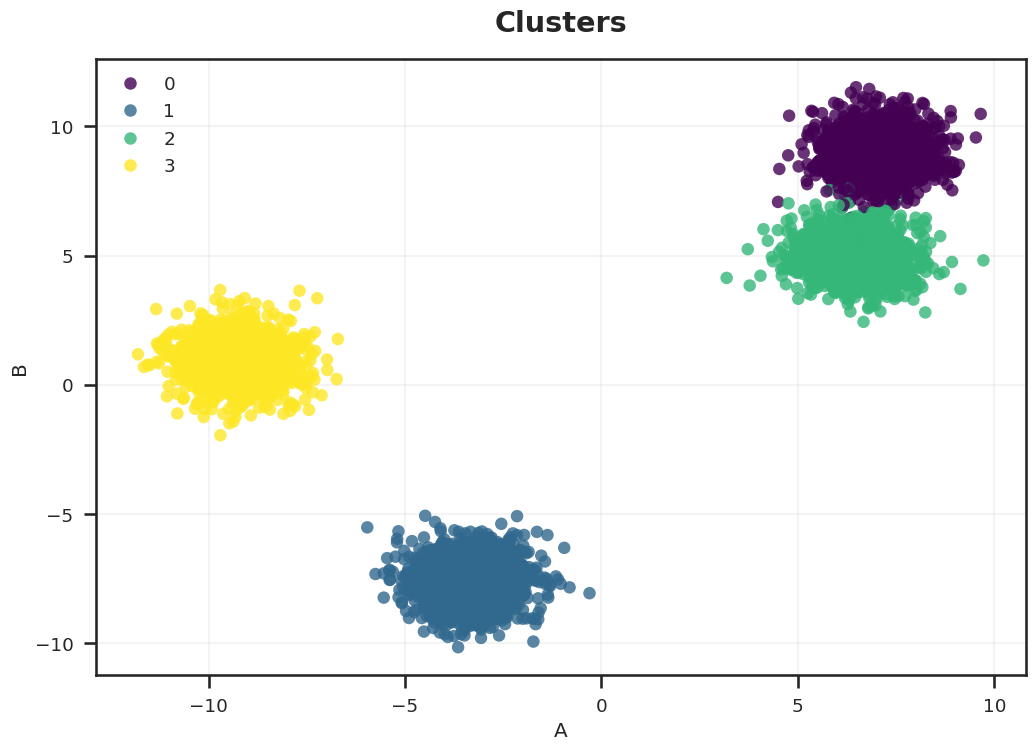

In [82]:
sns.scatterplot(data=df, x='A', y='B', hue = y, **scatter_kwargs)
plt.title('Clusters');


In [83]:
centroides ,  labels , inercia = k_means(df, n_clusters= 4 )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [84]:
k_means?

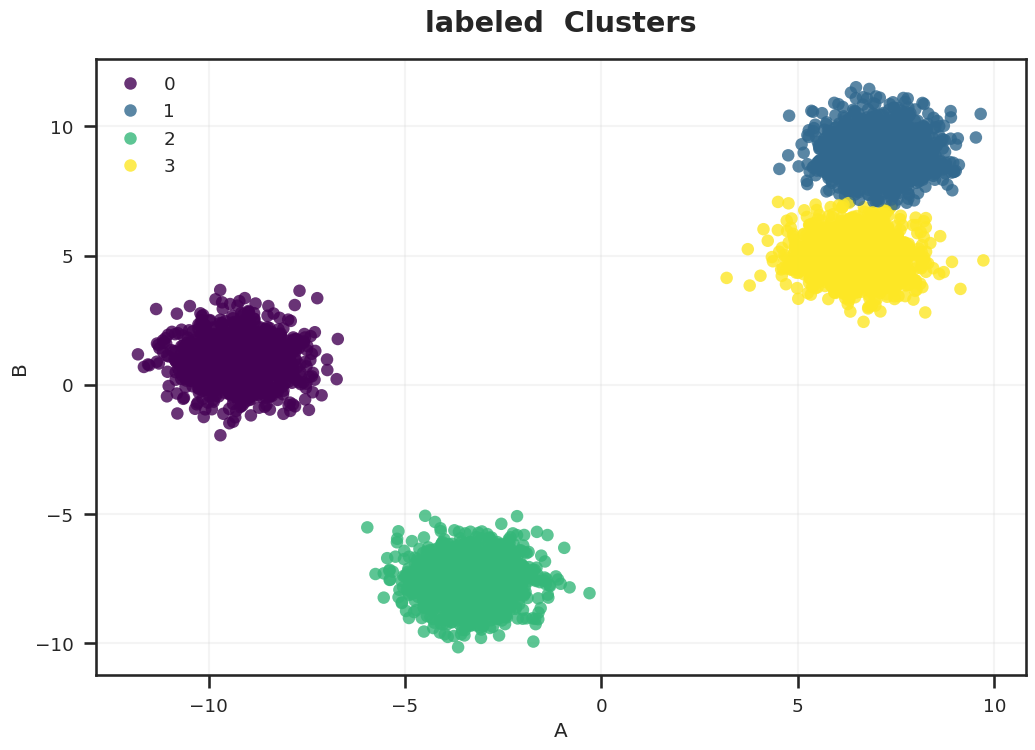

In [85]:
 sns.scatterplot(data = df , x = 'A',y= 'B', hue = labels, **scatter_kwargs)



plt.title('labeled  Clusters')
plt.show()

In [86]:
modelo =  KMeans(  n_clusters= 4 )
modelo.fit(df)


centroides = modelo.cluster_centers_
labels = modelo.labels_
inercia = modelo.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [87]:
print(centroides)
print(labels)
print(inercia)

[[ 6.4904598   5.00969649]
 [-3.31988741 -7.62011214]
 [-9.22530231  0.96906454]
 [ 7.09222415  8.98411319]]
[1 1 1 ... 3 1 3]
6289.199631146913


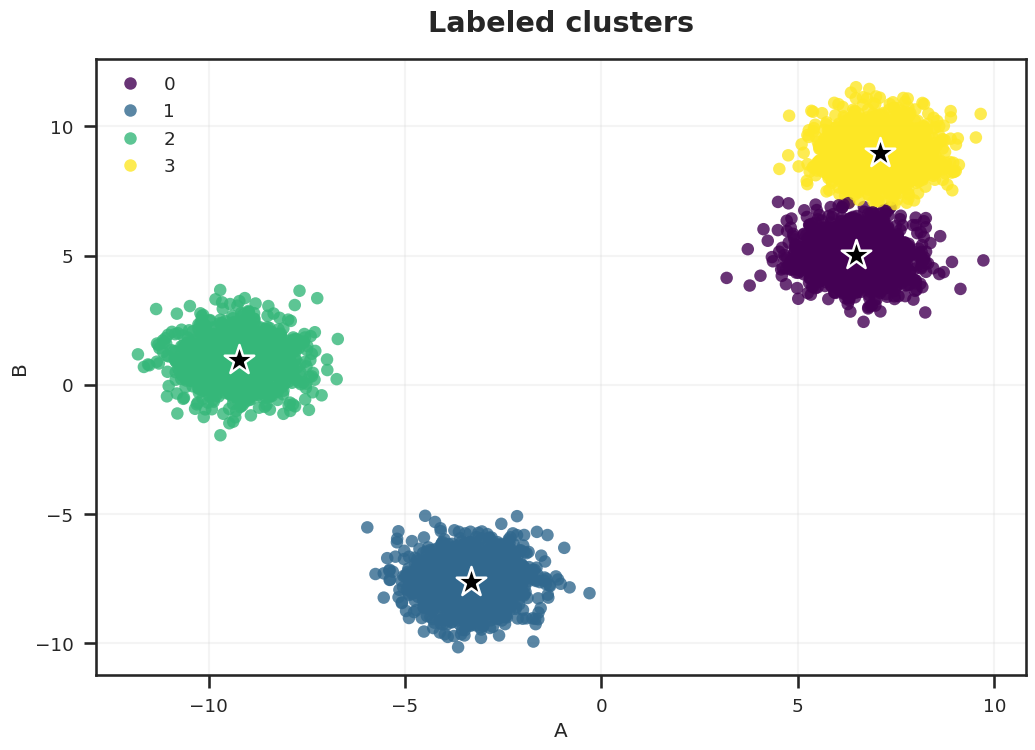

In [88]:
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
sns.scatterplot(x=centroides[:,0], y=centroides[:,1], marker='*', s=500, color='black', ax=ax)

plt.title('Labeled clusters')
plt.show()

In [89]:
#metricas

print(silhouette_score(df, labels))
print(davies_bouldin_score(df, labels))
print(calinski_harabasz_score(df, labels))

0.759589759440885
0.3408930960406884
112385.82568208198


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

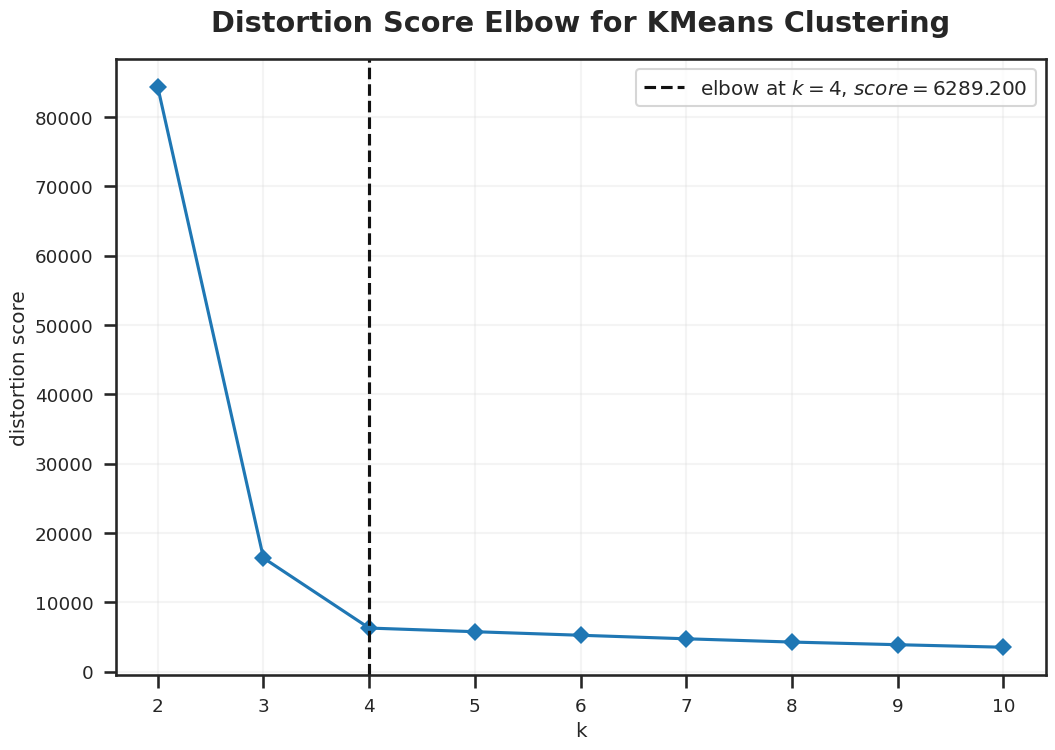

In [90]:
kelbow_visualizer(modelo, df, k=10, timings=False);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

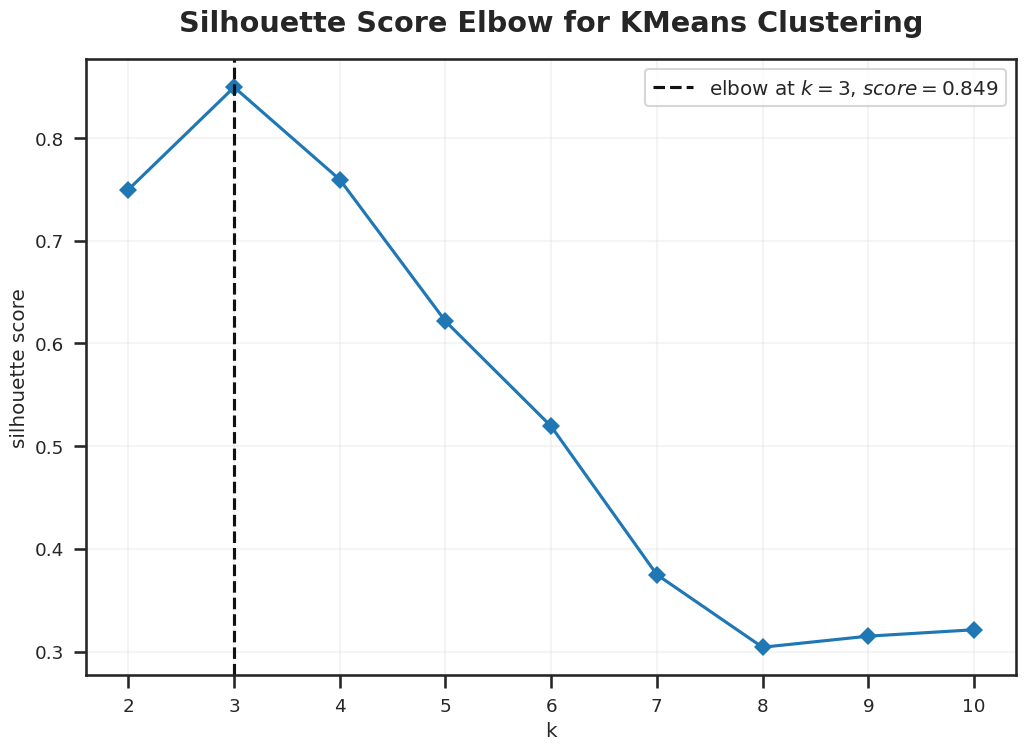

In [91]:
kelbow_visualizer(modelo, df, k=10, timings=False, metric='silhouette');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


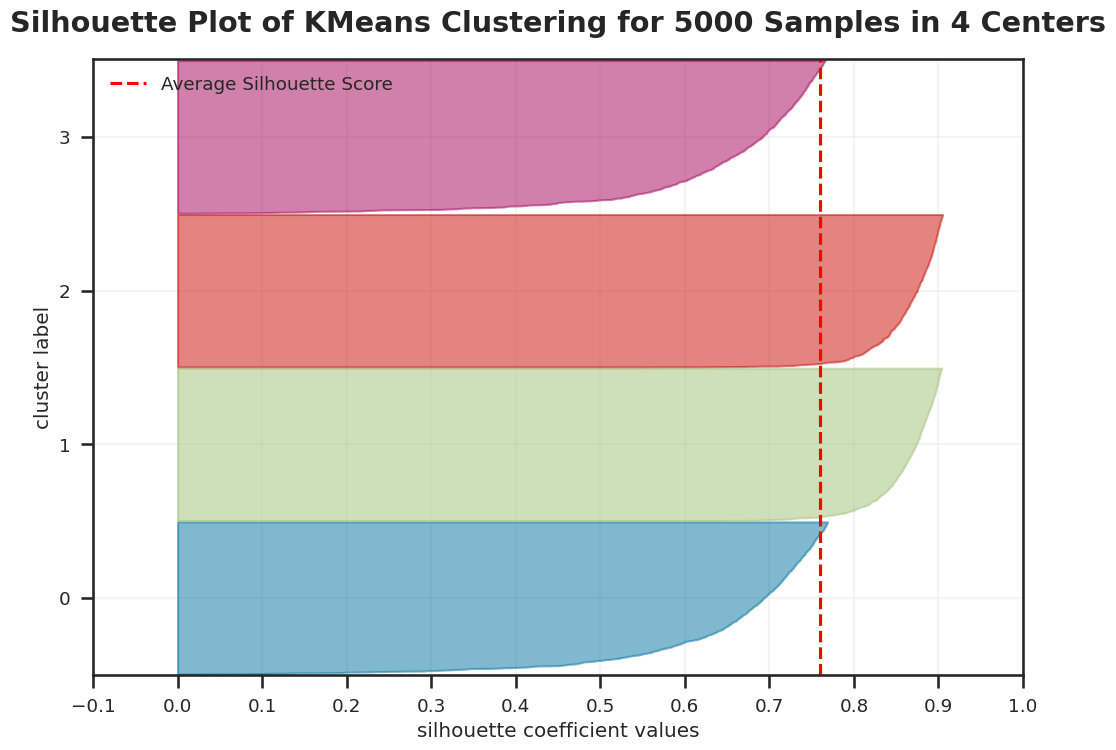

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

In [92]:
silhouette_visualizer(KMeans(n_clusters=4), df, colors='yellowbrick')

In [93]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(df)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(df, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[{'k': 2,
  'inertia': 84292.91721820505,
  'silhouette_score': 0.7498843875794999,
  'davies_bouldin_score': 0.4469553568012107,
  'calinski_harabasz_score': 20540.717017244453},
 {'k': 3,
  'inertia': 16387.991549381386,
  'silhouette_score': 0.8494839968019201,
  'davies_bouldin_score': 0.19039767449147407,
  'calinski_harabasz_score': 63168.55364805879},
 {'k': 4,
  'inertia': 6289.199631146913,
  'silhouette_score': 0.759589759440885,
  'davies_bouldin_score': 0.3408930960406884,
  'calinski_harabasz_score': 112385.82568208198},
 {'k': 5,
  'inertia': 5774.056403083914,
  'silhouette_score': 0.6603320800737588,
  'davies_bouldin_score': 0.6745621860299006,
  'calinski_harabasz_score': 91924.04650116806},
 {'k': 6,
  'inertia': 5251.762316121364,
  'silhouette_score': 0.48381808936229065,
  'davies_bouldin_score': 0.9983336952837911,
  'calinski_harabasz_score': 80919.41467974105},
 {'k': 7,
  'inertia': 4750.137611208652,
  'silhouette_score': 0.3759998288131288,
  'davies_bouldin

In [94]:
#identificando os melhores valores
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,84292.917218,0.749884,0.446955,20540.717017
3,16387.991549,0.849484,0.190398,63168.553648
4,6289.199631,0.759590,0.340893,112385.825682
5,5774.056403,0.660332,0.674562,91924.046501
6,5251.762316,0.483818,0.998334,80919.414680
7,4750.137611,0.376000,1.157081,74640.382887
8,4386.003003,0.382953,1.047000,69338.528816
9,3887.693455,0.313684,1.149267,68506.452339
10,3516.595214,0.320305,1.051672,67376.561417


In [95]:
# estilizando e indentificando os melhores valores sejam eles positivo ou negativo, isso depende de cada estilo de metricas.
# Por exemplo os valores que são melhores positivo são o calinski , silhoutte.
# o melhor valor negativo e o davis
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,84292.917218,0.749884,0.446955,20540.717017
3,16387.991549,0.849484,0.190398,63168.553648
4,6289.199631,0.759590,0.340893,112385.825682
5,5774.056403,0.660332,0.674562,91924.046501
6,5251.762316,0.483818,0.998334,80919.414680
7,4750.137611,0.376000,1.157081,74640.382887
8,4386.003003,0.382953,1.047000,69338.528816
9,3887.693455,0.313684,1.149267,68506.452339
10,3516.595214,0.320305,1.051672,67376.561417


In [96]:
# X_random with numpy
X_random = np.random.rand(*X.shape)
X_random

array([[0.6885634 , 0.79068744],
       [0.60102976, 0.28247615],
       [0.80761904, 0.78460639],
       ...,
       [0.09232318, 0.32177396],
       [0.3316565 , 0.6319954 ],
       [0.22810636, 0.32388498]])

In [97]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X_random)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X_random, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,518.843596,0.356586,1.175876,3037.403375
3,330.105980,0.377132,0.863149,3815.125025
4,209.434198,0.404749,0.772167,4967.727173
5,177.635169,0.376299,0.886798,4615.275275
6,149.388803,0.353617,0.960809,4578.349067
7,126.870007,0.358191,0.895632,4639.358704
8,106.651846,0.363445,0.807138,4864.626056
9,92.862361,0.365709,0.778472,4980.274908
10,84.256849,0.369851,0.815987,4934.683787


In [98]:
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,518.843596,0.356586,1.175876,3037.403375
3,330.105980,0.377132,0.863149,3815.125025
4,209.434198,0.404749,0.772167,4967.727173
5,177.635169,0.376299,0.886798,4615.275275
6,149.388803,0.353617,0.960809,4578.349067
7,126.870007,0.358191,0.895632,4639.358704
8,106.651846,0.363445,0.807138,4864.626056
9,92.862361,0.365709,0.778472,4980.274908
10,84.256849,0.369851,0.815987,4934.683787


interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

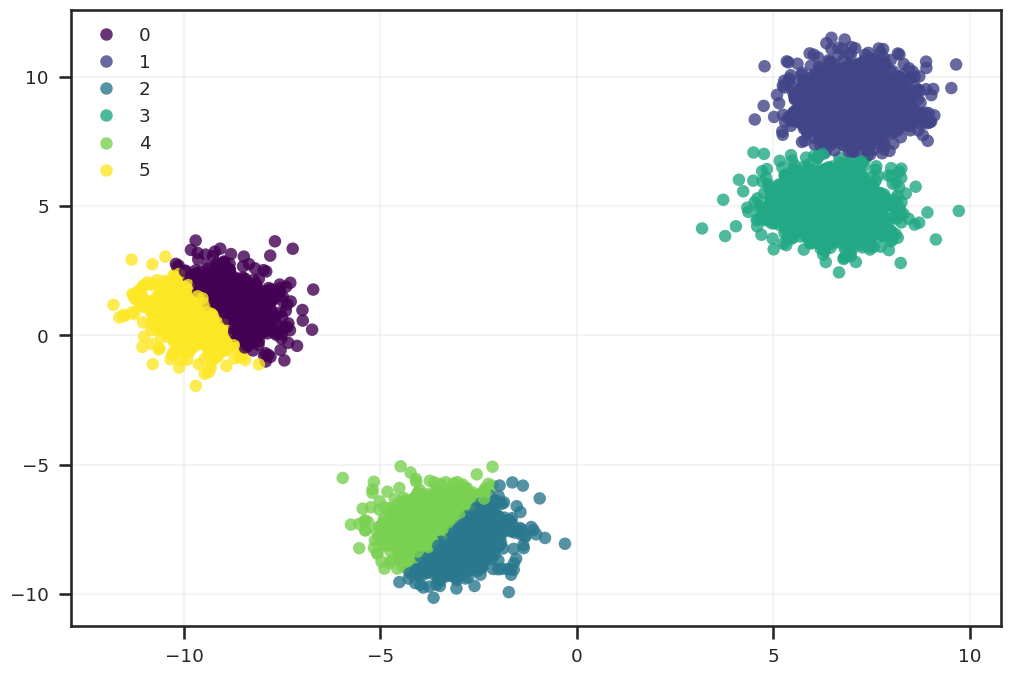

In [99]:
@interact(k=(2,11), data=['X','X_random'])
def plot_kmeans(k, data):
  data = X if data=='X' else X_random
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, **scatter_kwargs)

#DIMENSIONALIDADE


In [100]:
#SIMULANDO DADOS

X_dim,y_dim = datasets.make_blobs(n_samples=int(1E3), n_features=10, centers=4, cluster_std=.8, random_state=0)
df_dim = pd.DataFrame(X_dim, columns=list(string.ascii_uppercase[:X_dim.shape[1]]))
df_dim.head()

,A,B,C,D,E,F,G,H,I,J
0,1.375988,3.328840,2.252246,0.163276,-2.048389,1.498086,-1.626945,7.672603,9.713141,-2.330450
1,-4.778629,5.591210,-0.834382,0.333095,-10.125881,3.179277,2.914841,1.443623,9.603470,5.607201
2,11.184614,5.196295,-0.802285,5.042595,-7.432989,3.606461,-7.730530,8.711666,1.110940,-1.709037
3,9.696156,5.280882,-1.214031,4.589872,-8.312332,3.070013,-6.423507,9.210979,1.207334,-1.770543
4,-4.262755,4.842532,-0.878987,1.944770,-8.669946,2.534408,2.236930,0.444544,8.682765,3.178775


In [101]:
pca = PCA()
pca_components = pca.fit_transform(df_dim)

df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.856883,3.122523,6.136654,-0.686487,0.347968,-0.618029,-0.467717,-0.505754,-0.563464,0.814840
1,-11.436590,-6.559320,-4.410817,-1.239685,-0.029943,1.017996,0.895097,-0.878642,-0.584850,-0.537870
2,6.443283,9.334398,-3.091811,-1.298623,-0.771382,0.358402,0.372171,-0.301598,-1.050753,0.198899
3,5.114664,8.403564,-3.589742,-1.178399,-0.325189,-0.178110,-0.224107,-0.534450,0.190508,0.744221
4,-10.328252,-5.222973,-3.462066,0.586746,-0.655750,1.066886,-0.717080,0.606951,-1.759044,0.041215


In [102]:
# Verify explained variance
pd.DataFrame(
    {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
)

,explained_var,explained_var_cumsum
PC1,0.553295,0.553295
PC2,0.307542,0.860836
PC3,0.108453,0.969289
PC4,0.004899,0.974188
PC5,0.004765,0.978953
PC6,0.004509,0.983462
PC7,0.004389,0.987851
PC8,0.004282,0.992133
PC9,0.004086,0.996219
PC10,0.003781,1.000000


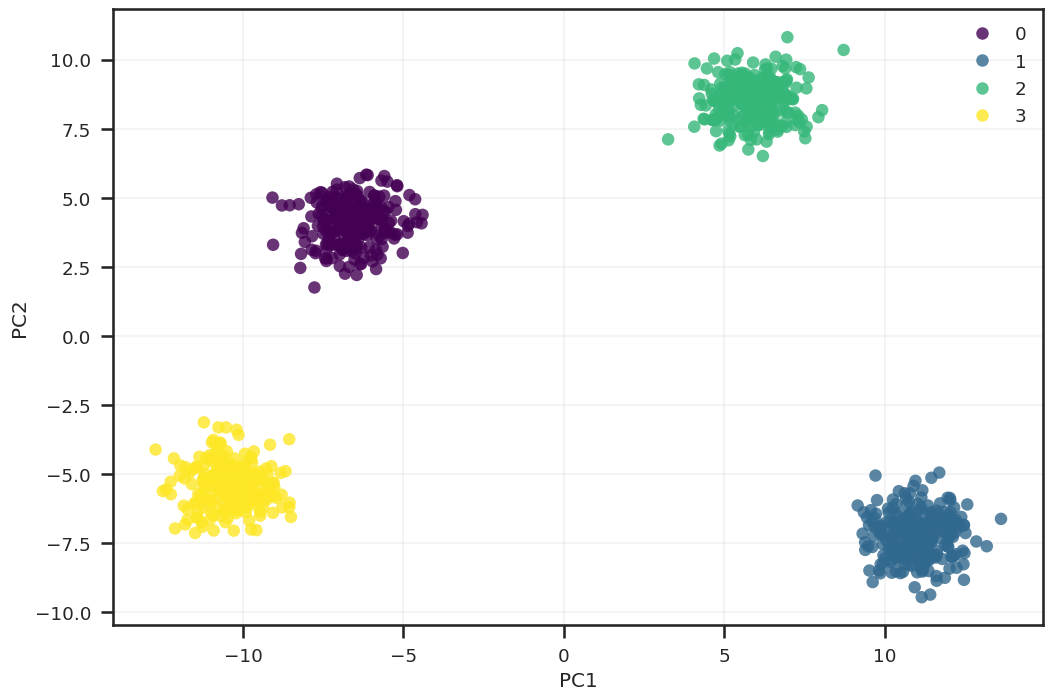

In [103]:
# Plot PCA with true label
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


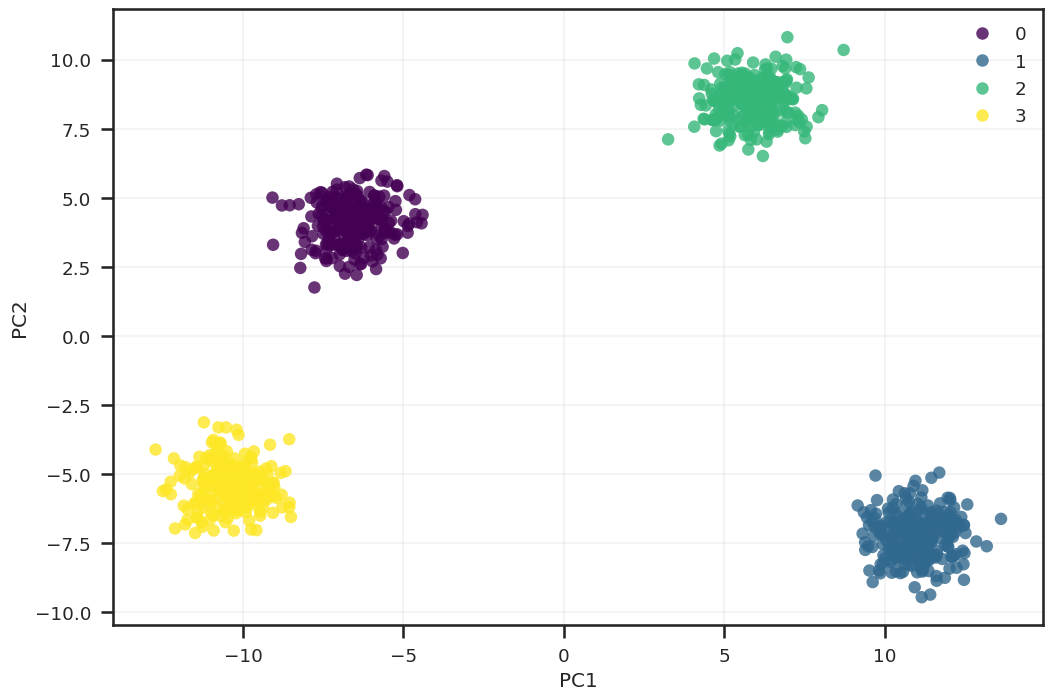

In [104]:
# Plot PCA with k-means label
labels = k_means(df_pca.iloc[:,:3], 4)[1]
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

In [105]:
# 3D PCA plot
px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=labels, template='plotly_dark')